## A/B Test: Compare Proportions: Simulation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
def resample_statistic (data, size=200, replace = True):
    data_df = pd.DataFrame(data, columns=['trial'])
    trial_df = data_df.sample(200,replace = True).reset_index(drop=True)
    pos_rate = trial_df['trial'].sum()/size
    return pos_rate
    
sample_size = 200
pos_response = 72
neg_response = 128

hat = np.append(np.repeat(1,pos_response),np.repeat(0,neg_response))
print(hat)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [3]:
with_replacement=True
n_repeats = 1000

trials = []
for i in range(n_repeats):
    trials.append(resample_statistic(hat,sample_size,sum))

Point Estimate: 0.36 

90% Confidence Interval: [0.30 0.41]



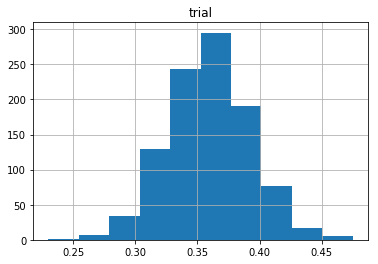

In [4]:
trials_df= pd.DataFrame(trials,columns=['trial'])

positive_rate = pos_response/float(sample_size)
ci = list(trials_df.quantile([0.05,0.95])['trial'])

print("Point Estimate: {} \n".format(positive_rate))
print("90% Confidence Interval: [{0:.2f} {1:.2f}]\n".format(ci[0],ci[1]))

trials_df.hist('trial')
plt.show()